In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("employee_compensation.csv")
data.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [ ]:
# Preprocessing
# null value treatment
# Outlier treatment
# Scaling
# Encoding

In [7]:
#First, chec if any variable not required

In [15]:
data = data.drop('Employee_Identifier', axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Type           50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Salaries            50000 non-null  float64
 3   Overtime            50000 non-null  float64
 4   Other_Salaries      50000 non-null  float64
 5   Total_Salary        50000 non-null  float64
 6   Retirement          50000 non-null  float64
 7   Health/Dental       50000 non-null  float64
 8   Other_Benefits      50000 non-null  float64
 9   Total_Benefits      50000 non-null  float64
 10  Total_Compensation  50000 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


In [21]:
# is year really integer
data['Year'].value_counts()

Year
2015    14699
2014    14155
2013    13605
2016     7541
Name: count, dtype: int64

In [ ]:
# only 4 shown, hence convert it to categorical variable

In [23]:
data['Year']=data['Year'].astype('object')

In [ ]:
#check for missing values


In [25]:
# Convert to n-1 dummy encoding
data = pd.get_dummies(data, columns=['Year_Type', 'Year'], drop_first=True, dtype=float)

In [27]:
data.head(2)

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63,1.0,0.0,1.0,0.0
1,1466.38,348.23,0.00,1814.61,0.0,442.03,141.59,583.62,2398.23,0.0,0.0,1.0,0.0


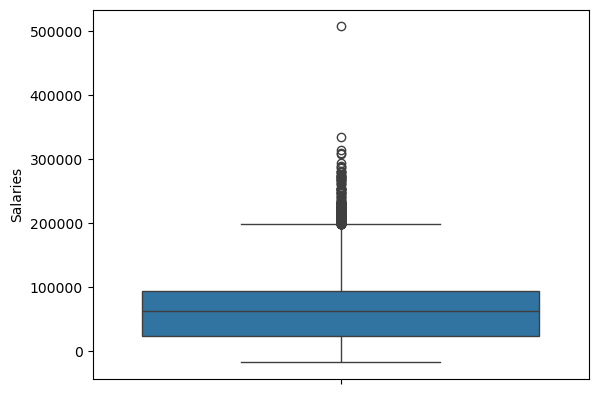

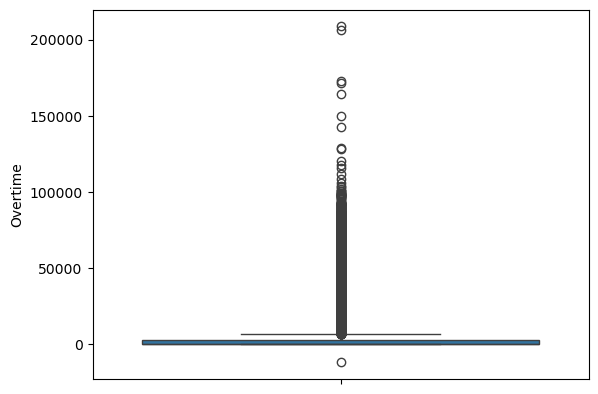

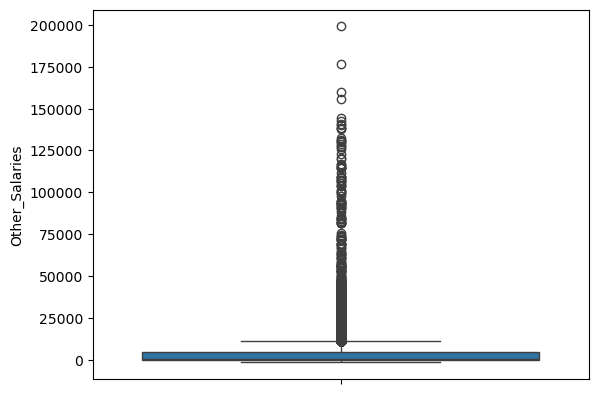

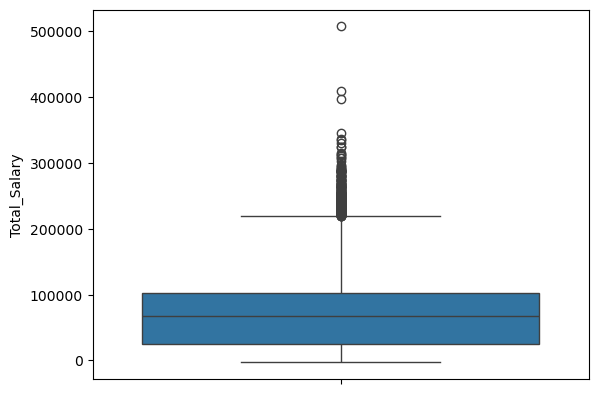

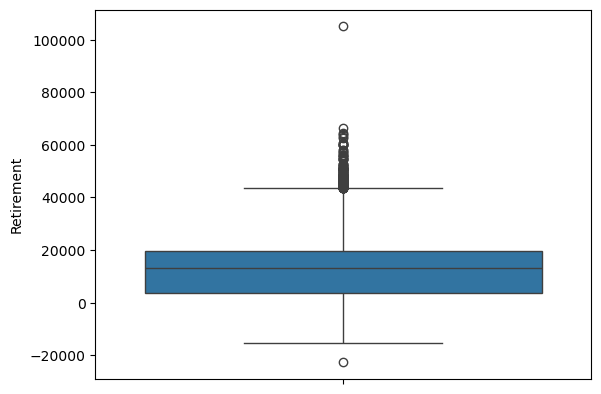

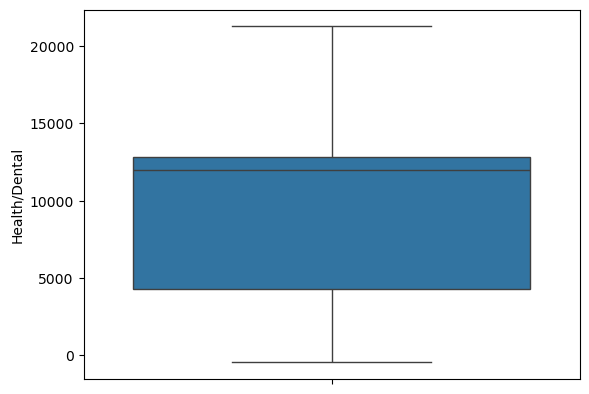

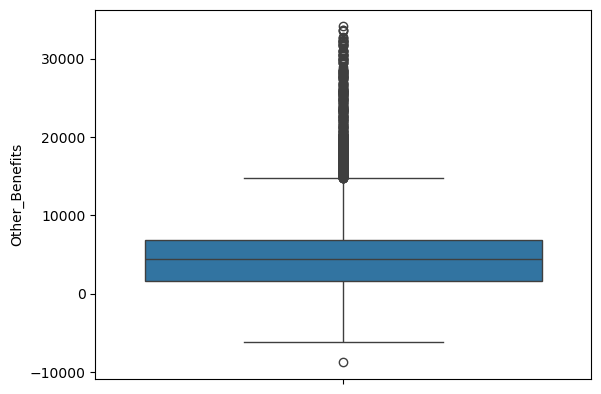

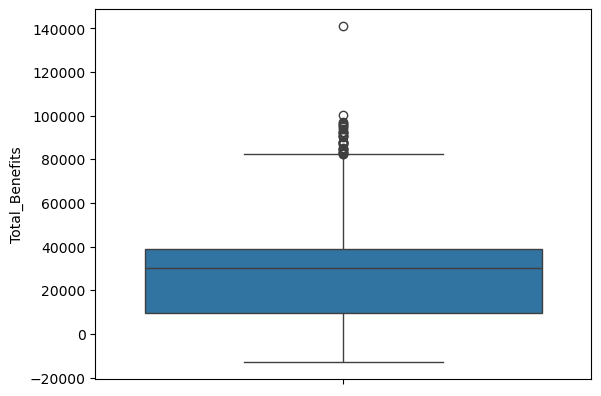

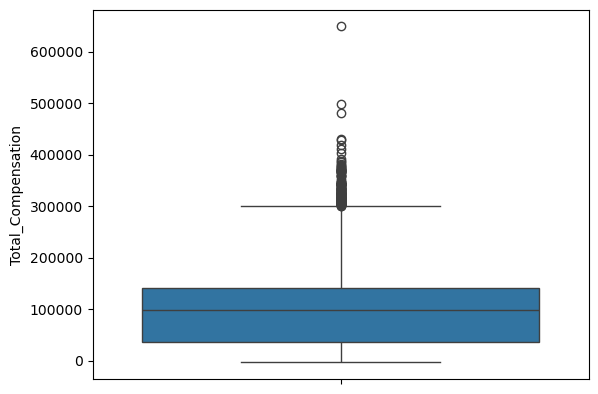

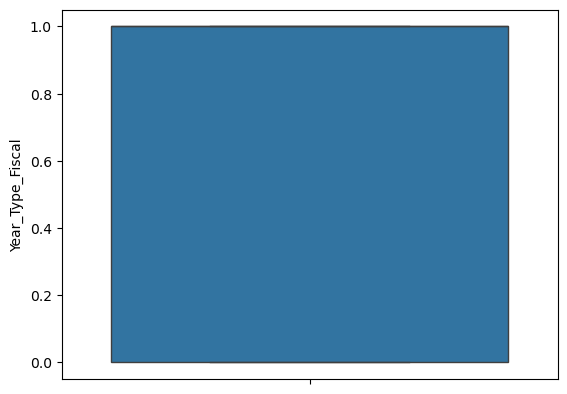

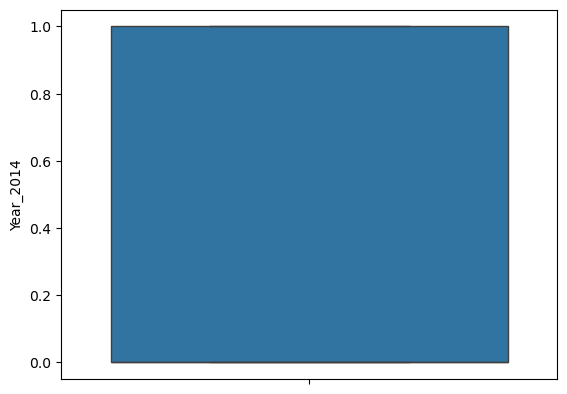

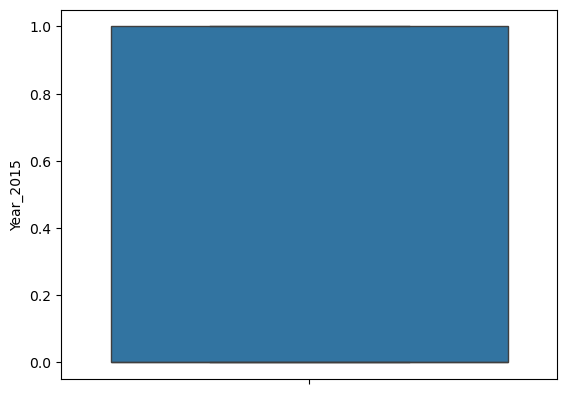

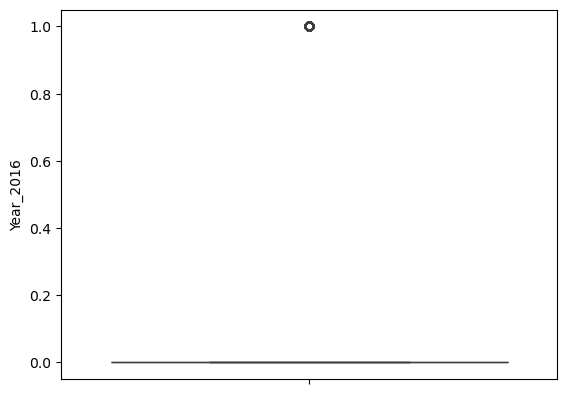

In [29]:
for i in data.columns :
    sb.boxplot(data[i])
    plt.show()

In [35]:
data1 = data.iloc[:,:-4]

In [39]:
q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)
iqr = q3-q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5*iqr

In [43]:
data2 = data[~( (data1<lb) | (data1>ub) ).any(axis=1)]

In [45]:
data2

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,1.0,0.0,1.0,0.0
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0.0,0.0,1.0,0.0
3,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1.0,1.0,0.0,0.0
4,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,1.0,0.0,0.0,0.0
5,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,10663.05,0.00,65.93,10728.98,0.00,3152.42,879.17,4031.59,14760.57,0.0,0.0,1.0,0.0
49996,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08,1.0,1.0,0.0,0.0
49997,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77,1.0,0.0,0.0,1.0
49998,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43,1.0,0.0,0.0,1.0


In [47]:
data2 = data2.reset_index(drop=True)

In [49]:
data2

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,1.0,0.0,1.0,0.0
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0.0,0.0,1.0,0.0
2,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1.0,1.0,0.0,0.0
3,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,1.0,0.0,0.0,0.0
4,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37716,10663.05,0.00,65.93,10728.98,0.00,3152.42,879.17,4031.59,14760.57,0.0,0.0,1.0,0.0
37717,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08,1.0,1.0,0.0,0.0
37718,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77,1.0,0.0,0.0,1.0
37719,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43,1.0,0.0,0.0,1.0


In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()
data_sc = sc.fit_transform(data2.iloc[:,:-4])

In [55]:
data_sc = pd.DataFrame(data_sc, columns=data2.iloc[:,:-4].columns)

In [57]:
data_sc

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551
...,...,...,...,...,...,...,...,...,...
37716,-1.025886,-0.428531,-0.559586,-1.048704,-1.180545,-0.950223,-1.022303,-1.148664,-1.087236
37717,-1.244380,-0.428531,-0.587284,-1.263887,-1.180545,-1.467262,-1.258772,-1.357355,-1.302770
37718,-0.388551,-0.428531,-0.587284,-0.427243,-0.405315,-0.210662,-0.315785,-0.351160,-0.410256
37719,-0.131486,-0.428531,4.010054,0.087410,-0.173001,0.541960,0.211008,0.116228,0.096354


In [59]:
data_final = pd.concat([ data_sc, data2.iloc[:,-4:] ], axis = 1)

In [61]:
data_final

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741,1.0,0.0,1.0,0.0
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489,0.0,0.0,1.0,0.0
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309,1.0,1.0,0.0,0.0
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591,1.0,0.0,0.0,0.0
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37716,-1.025886,-0.428531,-0.559586,-1.048704,-1.180545,-0.950223,-1.022303,-1.148664,-1.087236,0.0,0.0,1.0,0.0
37717,-1.244380,-0.428531,-0.587284,-1.263887,-1.180545,-1.467262,-1.258772,-1.357355,-1.302770,1.0,1.0,0.0,0.0
37718,-0.388551,-0.428531,-0.587284,-0.427243,-0.405315,-0.210662,-0.315785,-0.351160,-0.410256,1.0,0.0,0.0,1.0
37719,-0.131486,-0.428531,4.010054,0.087410,-0.173001,0.541960,0.211008,0.116228,0.096354,1.0,0.0,0.0,1.0


In [71]:
out = data2['Total_Compensation']
inp = data_final.drop('Total_Compensation', axis = 1)

In [77]:
import statsmodels.api as sm

In [79]:
inpc = sm.add_constant(inp)

In [83]:
ols = sm.OLS(out, inpc)

In [85]:
ols_mod = ols.fit()

In [87]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.243e+33
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:33:41   Log-Likelihood:             8.1537e+05
No. Observations:               37721   AIC:                        -1.631e+06
Df Residuals:                   37710   BIC:                        -1.631e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.663e+04   1.13e-12   6.78e+16      0.000    7.66e+04    7.66e+04
Salaries          2.073e+04   9.97e-13   2.08e+16      0.000    2.07e+04    2.07e+04
Overtime           680.7894    5.5e-13   1.24e+15      0.000     680.789     680.789
Other_Salaries    1214.4609   5.61e-13   2.16e+15      0.000    1214.461    1214.461
Total_Salary      2.035e+04    9.7e-13    2.1e+16      0.000    2.04e+04    2.04e+04
Retirement        6091.1128   1.51e-12   4.04e+15      0.000    6091.113    6091.113
Health/Dental     3476.0609   9.62e-13   3.61e+15      0.000    3476.061    3476.061
Other_Benefits    2154.1132    1.1e-12   1.96e+15      0.000    2154.113    2154.113
Total_Benefits    4869.7666    6.9e-13   7.06e+15      0.000    4869.767    4869.767
Year_Type_Fiscal  2.922e-11   1.11e-12     26.381      0.000     2.7e-11    3.14e-11
Year_2014        -1.251e-11   1.39e-12     -8.967      0.000   -1.52e-11   -9.77e-12
Year_2015        -4.547e-12   1.39e-12     -3.268      0.001   -7.27e-12   -1.82e-12
Year_2016         9.567e-12   1.73e-12      5.529      0.000    6.18e-12     1.3e-11
==============================================================================
Omnibus:                     1510.793   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3914.969
Skew:                          -0.196   Prob(JB):                         0.00
Kurtosis:                       4.529   Cond. No.                     1.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif = pd.DataFrame()

In [95]:
vif ['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]

In [97]:
vif['feature'] = inp.columns
vif.sort_values('VIF', ascending = False)

,VIF,feature
0,inf,Salaries
1,inf,Overtime
2,inf,Other_Salaries
3,inf,Total_Salary
4,inf,Retirement
5,inf,Health/Dental
6,inf,Other_Benefits
7,inf,Total_Benefits
8,2.065337,Year_Type_Fiscal
11,1.545000,Year_2016


In [101]:
inpv1 = inp.drop('salaries', axis = 1)

In [105]:
vif = pd.DataFrame()
vif ['VIF'] = [variance_inflation_factor(inpv1.values, i) for i in range(inpv1.shape[1])]
vif['feature'] = inpv1.columns
vif.sort_values('VIF', ascending = False)

,VIF,feature
3,inf,Retirement
4,inf,Health/Dental
5,inf,Other_Benefits
6,inf,Total_Benefits
2,15.008804,Total_Salary
7,2.065337,Year_Type_Fiscal
10,1.545000,Year_2016
9,1.300030,Year_2015
8,1.283136,Year_2014
1,1.271564,Other_Salaries


In [107]:
inpv2 = inpv1.drop('Retirement', axis = 1)

In [109]:
vif = pd.DataFrame()
vif ['VIF'] = [variance_inflation_factor(inpv2.values, i) for i in range(inpv2.shape[1])]
vif['feature'] = inpv2.columns
vif.sort_values('VIF', ascending = False)

,VIF,feature
5,43.035389,Total_Benefits
2,15.008804,Total_Salary
3,9.417625,Health/Dental
4,6.641277,Other_Benefits
6,2.065337,Year_Type_Fiscal
9,1.545000,Year_2016
8,1.300030,Year_2015
7,1.283136,Year_2014
1,1.271564,Other_Salaries
0,1.159517,Overtime


In [111]:
inpv3 = inpv2.drop('Total_Benefits', axis = 1)

In [115]:
vif = pd.DataFrame()
vif ['VIF'] = [variance_inflation_factor(inpv3.values, i) for i in range(inpv3.shape[1])]
vif['feature'] = inpv3.columns
vif.sort_values('VIF', ascending = False)

,VIF,feature
2,5.851542,Total_Salary
4,4.636811,Other_Benefits
3,3.185484,Health/Dental
5,2.050162,Year_Type_Fiscal
8,1.535738,Year_2016
7,1.266620,Year_2015
1,1.257714,Other_Salaries
6,1.252008,Year_2014
0,1.159510,Overtime


In [120]:
mod = sm.OLS(out,inpv3)

In [122]:
ols_mod = mod.fit()

In [125]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Total_Compensation   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          2.760e+04
Date:                Sat, 23 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:07:06   Log-Likelihood:                     -4.4783e+05
No. Observations:               37721   AIC:                                  8.957e+05
Df Residuals:                   37712   BIC:                                  8.958e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Overtime          -499.6557    192.156     -2.600      0.009    -876.287    -123.025
Other_Salaries     -81.1966    200.128     -0.406      0.685    -473.453     311.060
Total_Salary      4.916e+04    431.670    113.872      0.000    4.83e+04       5e+04
Health/Dental     7557.6103    318.497     23.729      0.000    6933.349    8181.872
Other_Benefits    2810.6731    384.261      7.314      0.000    2057.511    3563.836
Year_Type_Fiscal  3.704e+04    336.630    110.038      0.000    3.64e+04    3.77e+04
Year_2014         5.878e+04    373.997    157.175      0.000     5.8e+04    5.95e+04
Year_2015         5.861e+04    372.926    157.168      0.000    5.79e+04    5.93e+04
Year_2016         3.855e+04    570.747     67.538      0.000    3.74e+04    3.97e+04
==============================================================================
Omnibus:                     2966.234   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3246.462
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       2.551   Cond. No.                         6.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

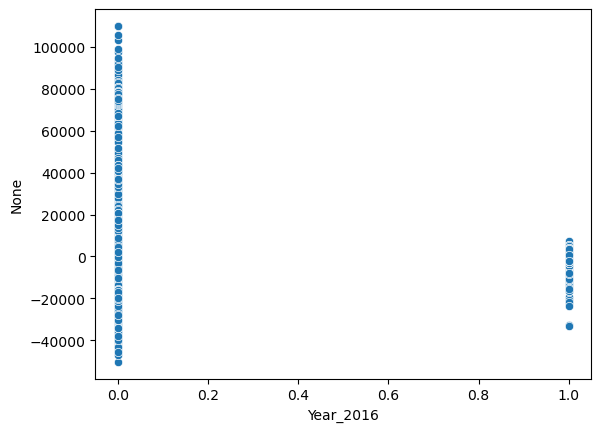

In [127]:
## Checking linearity
ypred = ols_mod.predict()
sb.scatterplot(x=inpv3[i], y = ols_mod.resid)
plt.show()

In [131]:
from statsmodels.stats.diagnostic import linear_rainbow

In [133]:
linear_rainbow(res=ols_mod, frac = 0.5)

(0.98150139345071, 0.9000713645807361)